#PS PBL :-) SALES DATA ANALYSIS


In [32]:
import pandas as pd
import os

#merge all the data in a single file. it is important because it is easy to work with a single file rather than working with 12 different files

In [33]:

files = [file for file in os.listdir("./sales_data")]

all_data_fin = pd.DataFrame()

for file in files:
    print(file)
    df = pd.read_csv("./sales_data/"+file)
    all_data_fin = pd.concat([all_data_fin,df])
    
all_data_fin.to_csv("all_data_fin.csv", index=False)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


#Add additional columns

###add month colums

#cleaning NaN data

In [34]:
nan_df = all_data_fin[all_data_fin.isna().any(axis=1)]
nan_df.head()

Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN

In [35]:
all_data_fin = all_data_fin.dropna(how='all')
all_data_fin.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

In [36]:
all_data_fin['month'] = all_data_fin['Order Date'].str[0:2]
all_data_fin['month'] = all_data_fin['month'].astype('int32')
all_data_fin.head()

ValueError: invalid literal for int() with base 10: 'Or'

#find or and delete

In [37]:
all_data_fin = all_data_fin[all_data_fin['Order Date'].str[0:2]!='Or']
all_data_fin.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04

#best month for sales? How much earned

###add a sales column for this

In [38]:
all_data_fin['Quantity Ordered'] = pd.to_numeric(all_data_fin['Quantity Ordered'])
all_data_fin['Price Each'] = pd.to_numeric(all_data_fin['Price Each'])

all_data_fin.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04

In [39]:
all_data_fin['Sales'] = all_data_fin['Quantity Ordered']*all_data_fin['Price Each']
all_data_fin.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address month   Sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04   11.99

In [40]:
results = all_data_fin.groupby('month').sum()

C:\Users\chand\AppData\Local\Temp\ipykernel_604\4022306667.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data_fin.groupby('month').sum()


In [41]:
import matplotlib.pyplot as plt

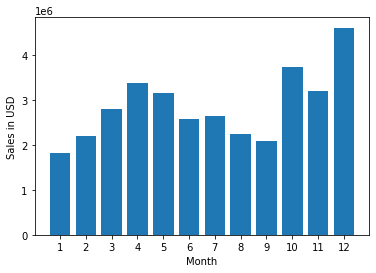

In [42]:
months = range(1,13)

plt.bar(months,results['Sales'])

plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show()

#Which city had the highest number of sales

In [43]:
#.apply

all_data_fin['City']=all_data_fin['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data_fin.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04   11.99   

           City  
0        Dallas  
2        Boston  
3   Los Angeles  
4   Los Angeles  
5   Los Angeles

In [44]:
# all_data_fin.drop('Column', axis=1)

In [45]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

def get_city(address):
    return address.split(',')[1]

all_data_fin['City']  = all_data_fin['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))
all_data_fin.head()


Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04   11.99   

              City  
0        Dallas TX  
2        Boston MA  
3   Los Angeles CA  
4   Los Angeles CA  
5   Los Angeles CA

In [46]:
city_sales = all_data_fin.groupby('City').sum()
city_sales

C:\Users\chand\AppData\Local\Temp\ipykernel_604\165853847.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_sales = all_data_fin.groupby('City').sum()


Quantity Ordered  Price Each       Sales
City                                                       
 Atlanta GA                   16602  2779908.20  2795498.58
 Austin TX                    11153  1809873.61  1819581.75
 Boston MA                    22528  3637409.77  3661642.01
 Dallas TX                    16730  2752627.82  2767975.40
 Los Angeles CA               33289  5421435.23  5452570.80
 New York City NY             27932  4635370.83  4664317.43
 Portland ME                   2750   447189.25   449758.27
 Portland OR                  11303  1860558.22  1870732.34
 San Francisco CA             50239  8211461.74  8262203.91
 Seattle WA                   16553  2733296.01  2747755.48

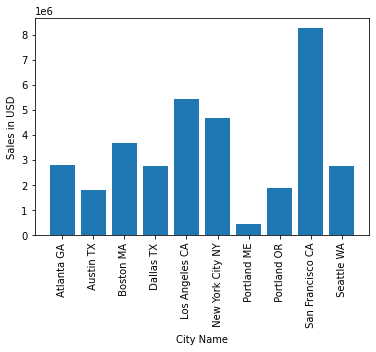

In [47]:
# citys = all_data_fin['City'].unique() {this showws inconsistency in data}
citys = [city for city, df in all_data_fin.groupby('City')]
plt.bar(citys,city_sales['Sales'])

plt.xticks(citys, rotation='vertical', size=10)
plt.ylabel('Sales in USD')
plt.xlabel('City Name')
plt.show()

#time to show advertises


In [48]:
#changing to date-time format

all_data_fin['Order Date'] = pd.to_datetime(all_data_fin['Order Date'])
    
all_data_fin.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001    04   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215    04   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001    04  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001    04   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001    04   11.99   

              City  
0        Dallas TX  
2        Boston MA  
3   Los Angeles CA  
4   Los Angeles CA  
5   Los Angeles CA

In [49]:
all_data_fin['Hour'] = all_data_fin['Order Date'].dt.hour
all_data_fin['Minute'] = all_data_fin['Order Date'].dt.minute

all_data_fin.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001    04   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215    04   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001    04  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001    04   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001    04   11.99   

              City  Hour  Minute  
0        Dallas TX     8      46  
2        Boston MA    22      30  
3   Los Angeles CA    14      38  
4   Los Angeles CA    14      38  
5   Los Angeles CA     9      27

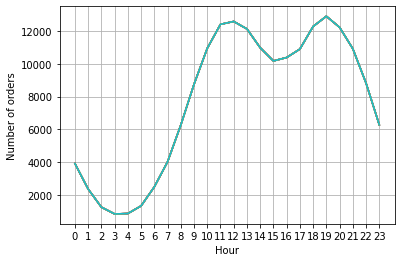

In [60]:
hours = [hour for hour, df in all_data_fin.groupby('Hour')]

plt.plot(hours, all_data_fin.groupby(['Hour']).count())

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()


#What products are most often sold together

In [51]:
#if they have same order id, it means they are sold together

In [52]:
df = all_data_fin[all_data_fin['Order ID'].duplicated(keep=False)]
df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#drop duplicates of the same occurences
df = df[['Order ID','Grouped Products']].drop_duplicates()

df.head(1000)

C:\Users\chand\AppData\Local\Temp\ipykernel_604\1043594187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Order ID                                   Grouped Products
3      176560                      Google Phone,Wired Headphones
18     176574                  Google Phone,USB-C Charging Cable
30     176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32     176586                AAA Batteries (4-pack),Google Phone
119    176672      Lightning Charging Cable,USB-C Charging Cable
...       ...                                                ...
7423   243776        Apple Airpods Headphones,Macbook Pro Laptop
7489   243841               Vareebadd Phone,USB-C Charging Cable
7496   243847                    iPhone,Lightning Charging Cable
7517   243866                    20in Monitor,Macbook Pro Laptop
7573   243921                            iPhone,Wired Headphones

[1000 rows x 2 columns]

In [53]:
#count pairs of what occurs most freuquently

In [54]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))       #most common 2 items together
#     count.update(Counter(combinations(row_list,3)))       #most common 3 items together
#     count.update(Counter(combinations(row_list,4)))       #most common 4 items together
    
count.most_common(100000)
    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B


#most sold product


C:\Users\chand\AppData\Local\Temp\ipykernel_604\3722137491.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


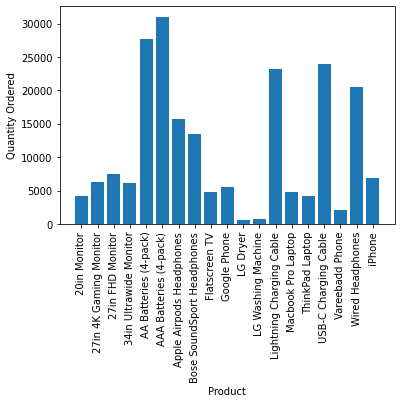

In [55]:
product_group = all_data_fin.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=10)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')




plt.show()





C:\Users\chand\AppData\Local\Temp\ipykernel_604\3465443721.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Prices = all_data_fin.groupby('Product').mean()['Price Each']
C:\Users\chand\AppData\Local\Temp\ipykernel_604\3465443721.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical', size=8)


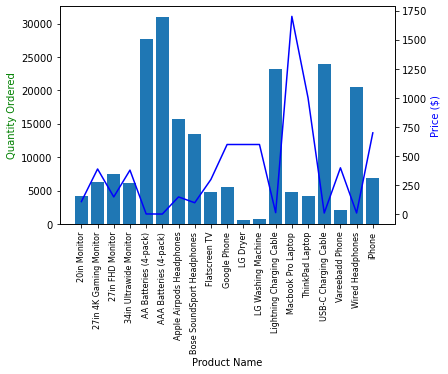

In [56]:
#overlay this graph with the prices of the products

Prices = all_data_fin.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot (products, Prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,rotation='vertical', size=8)

plt.show()